In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms


import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
transform = transforms.ToTensor()

In [4]:
dataset = datasets.CIFAR10('/content', 
                           train=True, 
                           transform=transform, 
                           target_transform=None, 
                           download=True)

Files already downloaded and verified


In [0]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
bs=10

In [0]:
data = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True)

In [0]:
data_iter = iter(data)
images, y = data_iter.next()
images = np.asarray(images)

In [9]:
images[0].shape

(3, 32, 32)

In [0]:
def channels_last(tensor_image):  
  # If you try to plot image with shape (C, H, W)
  # You will get TypeError:
  # plt.imshow(tensor_image)

  # So we need to reshape it to (H, W, C):
  tensor_image =np.transpose(tensor_image, (1, 2, 0))
  # CANNOT np.reshape It messes with the data
  return tensor_image

**!!! The output of torchvision datasets are PILImage images of range [0, 1]**

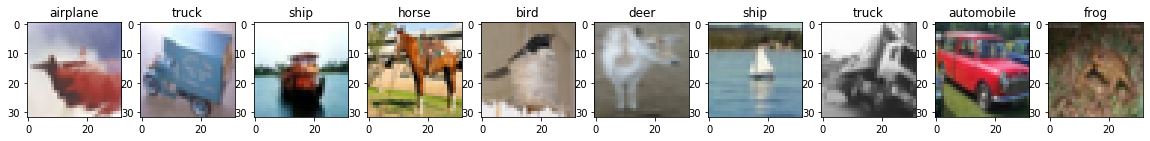

In [11]:
fig = plt.figure(figsize=(20,10))
for i in range(10):
      ax = fig.add_subplot(1,10,i+1)
      ax.set_title(classes[y[i].data])
      ax.imshow(channels_last(images[i]))
  

**Visualise with more detail**

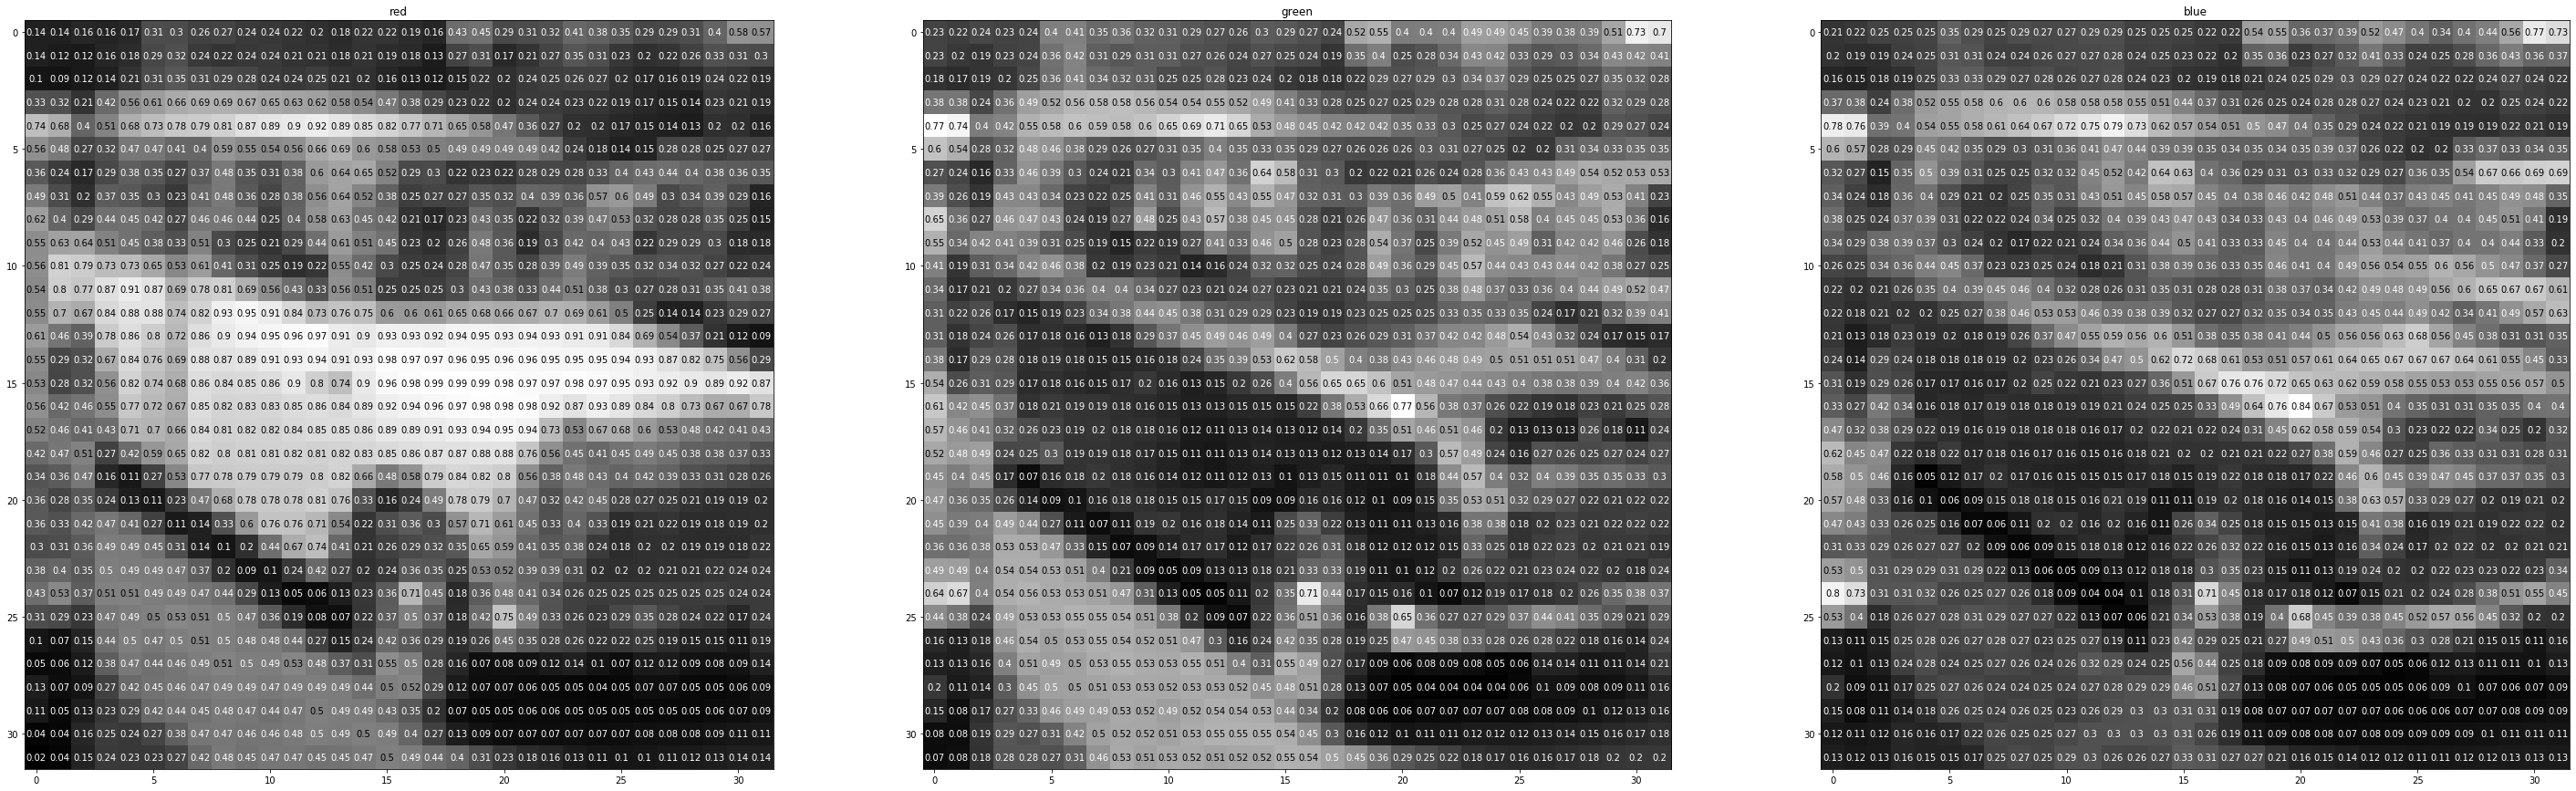

In [23]:
channels = ['red', 'green', 'blue']
single_img = images[8]
fig = plt.figure(figsize=(50,30))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.set_title(channels[i])
  ax.imshow(single_img[i], cmap='gray')
  for y in range(32):
    for x in range(32):
      pixel_value = single_img[i][y][x].item()
      ax.annotate(s=round(pixel_value,2), xy=(x,y),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color = "white" if pixel_value<0.5 else "black")